TIANA NORRIS

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mush_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mush_df.columns):
    print(f'{k:>3}. {col} - {mush_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [120]:

y = mush_df['type']
X = mush_df.drop(columns = 'type')

all_features = list(X.columns)

ord_features = ['gill_attachment',
                'gill_spacing',
                'gill_size',
                'stalk_shape',
                'bruises',
                'ring_number',
                'population']
ordEnc = OrdinalEncoder()
cat_features = [col for col in all_features if col not in ord_features]
hotEnc = OneHotEncoder()
ct = ColumnTransformer([
    ('ord', ordEnc, ord_features),
    ('hot',hotEnc, cat_features),
],
                       remainder = 'passthrough',
                       verbose_feature_names_out=False
                       )
X_trans = ct.fit_transform(X)
features_names = ct.get_feature_names_out()
labEnc = LabelEncoder()

y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans)


In [121]:


mush_params = {'max_depth':[2,4,6],
               'min_samples_split':[5,10,20]}
mush_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(mush_clf,
                           param_grid = mush_params,
                           cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [5, 10, 20]})

In [122]:
mush_clf = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 6, 'min_samples_split': 5}

In [ ]:
#X_train = ct.fit_transform(X)
#y_train = labEnc.fit_transform(y)

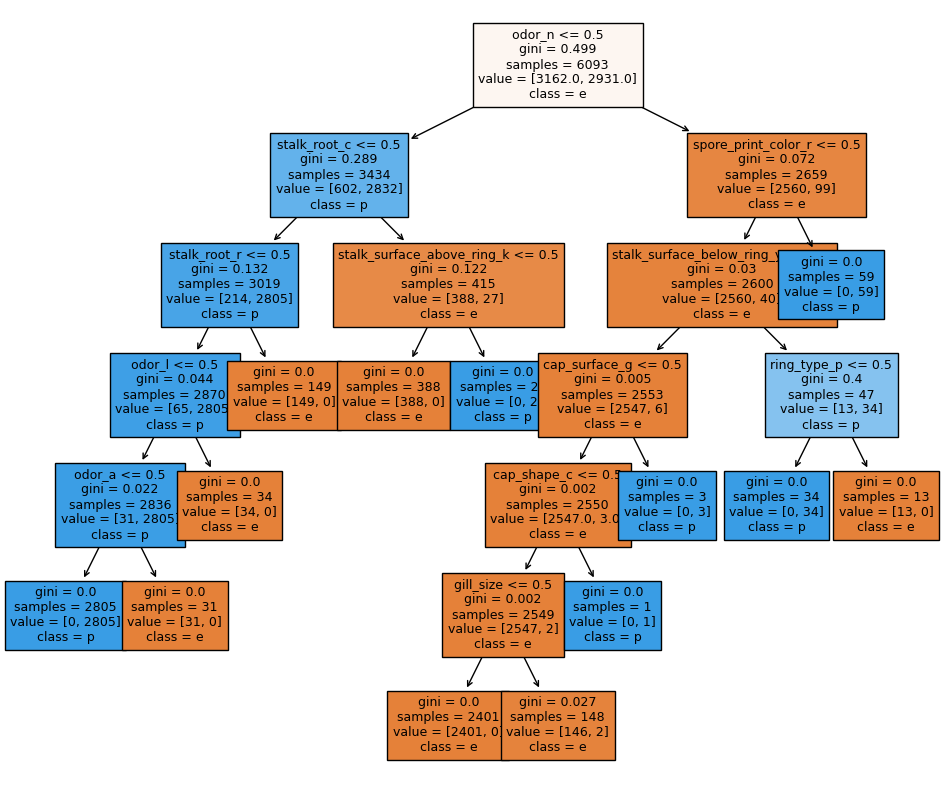

In [123]:

fig, ax = plt.subplots(1,1, figsize = (12, 10))
plot_tree(mush_clf,
          filled = True, fontsize = 9,
          feature_names = features_names, class_names = label_names)

plt.show()

In [124]:

model_LogReg = LogisticRegression(penalty = None, max_iter = 10000)
model_LogReg.fit(X_train, y_train)


y_pred = model_LogReg.predict(X_test) 
y_pred_prob = model_LogReg.predict_proba(X_test)
y_pred_prob


array([[9.99997205e-01, 2.79504010e-06],
       [9.99999260e-01, 7.39629003e-07],
       [5.71946058e-06, 9.99994281e-01],
       ...,
       [9.99999999e-01, 6.98208356e-10],
       [2.63137915e-06, 9.99997369e-01],
       [9.99999959e-01, 4.12748418e-08]])

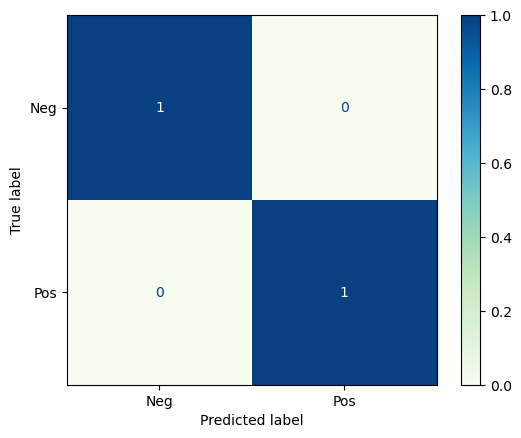

In [125]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        normalize = 'true',
                                        display_labels = ['Neg', 'Pos'],
                                        cmap = 'GnBu'
                                        )
plt.show()

In [126]:
cr = classification_report(y_test, y_pred, target_names = ['Neg', 'Pos'])
print(cr)

              precision    recall  f1-score   support

         Neg       1.00      1.00      1.00      1046
         Pos       1.00      1.00      1.00       985

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:
Similar models
- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [21]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
draft_df = pd.DataFrame(nfl_draft)
nfl_df = draft_df.dropna(axis=1)
nfl_df['round'] = Y
rounds_labels =['day 1','day 2','day 3']
print(nfl_df['round'].unique())



nfl_df.head()

[1 2 3 4 5 6 7]


C:\Users\Tim Norris\AppData\Local\Temp\ipykernel_3052\3444092562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_df['round'] = Y


,Unnamed: 0,round,season,name,position,height,weight
0,0,1,2003,Dewayne Robertson,DL,6.083333,317.0
1,1,1,2003,Terence Newman,DB,5.833333,189.0
2,2,1,2003,Johnathan Sullivan,DL,6.250000,313.0
3,3,1,2003,Kevin Williams,DL,6.416667,304.0
4,4,1,2003,Terrell Suggs,LB,6.250000,262.0


In [42]:

Y = nfl_df['round']
x = nfl_df.drop(columns=['round','name'])

num_features = ['height','weight']
ss = StandardScaler()

cat_features = ['position']
oneHotEnc = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[
        ("ss", ss, num_features),   
        ("hotone", oneHotEnc, cat_features)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_tran = ct.fit_transform(x)

features_names = ct.get_feature_names_out()
labEnc = LabelEncoder()
y_tran = labEnc.fit_transform(Y)
label_names = labEnc.classes_

X_train, X_test, y_train, y_test = train_test_split(X_tran, y_tran)
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model_Lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2)
model_Lasso.fit(X_train_scaled, y_train)

y_pred_train = model_Lasso.predict(X_train)
y_pred = model_Lasso.predict(X_test_scaled)

y_pred_prob = model_Lasso.predict_proba(X_test_scaled)


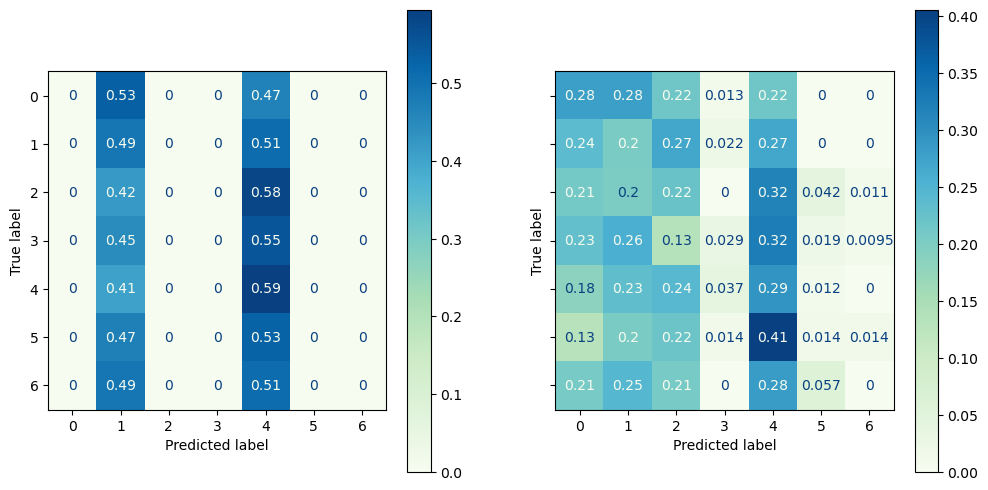

In [43]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey=True)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, 
                                        normalize = 'true',
                                        cmap = 'GnBu',
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        normalize = 'true',
                                        cmap = 'GnBu',
                                        ax = ax[1])
plt.show()

In [58]:
nfl_cr = classification_report(y_test, y_pred, target_names = ['0','1','2','3','4','5','6'])
print(nfl_cr)

              precision    recall  f1-score   support

           0       0.16      0.24      0.19        79
           1       0.12      0.17      0.14        93
           2       0.19      0.26      0.22        95
           3       0.22      0.02      0.04       105
           4       0.14      0.32      0.20        82
           5       0.00      0.00      0.00        69
           6       0.00      0.00      0.00        53

    accuracy                           0.15       576
   macro avg       0.12      0.14      0.11       576
weighted avg       0.13      0.15      0.12       576



c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


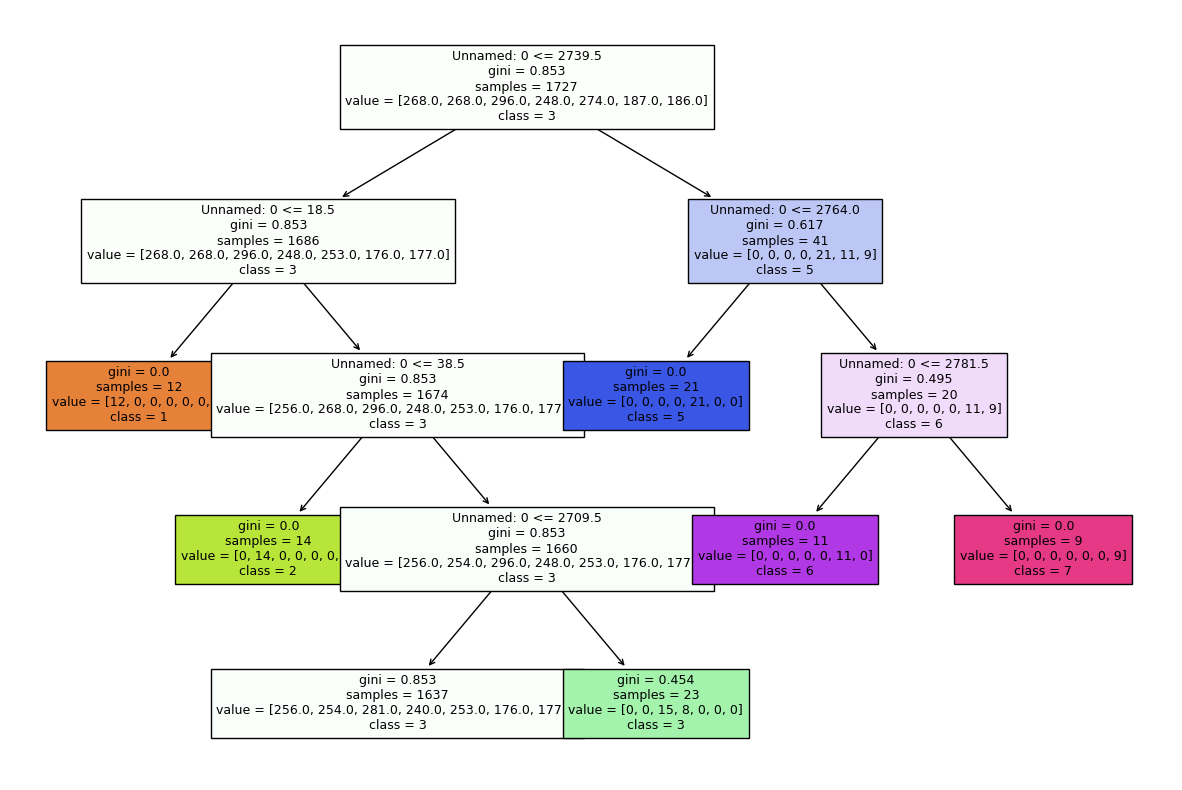

In [49]:
nfl_clf = DecisionTreeClassifier(max_depth = 4)

nfl_clf.fit(X_train, y_train)
y_pred = nfl_clf.predict(X_test)

fig, ax = plt.subplots(1,1, figsize = (15, 10))
label_names = [str(label) for label in label_names] 
plot_tree(nfl_clf,
          filled = True, fontsize = 9,
          feature_names = features_names, class_names = label_names)

plt.show()

In [56]:

nfl_params = {'max_depth':[2,4,6],
               'min_samples_split':[5,10,20]}
nfl_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(nfl_clf,
                           param_grid = nfl_params,
                           cv = 5)

grid_search.fit(X_train, y_train)
nfl_clf = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 6, 'min_samples_split': 5}

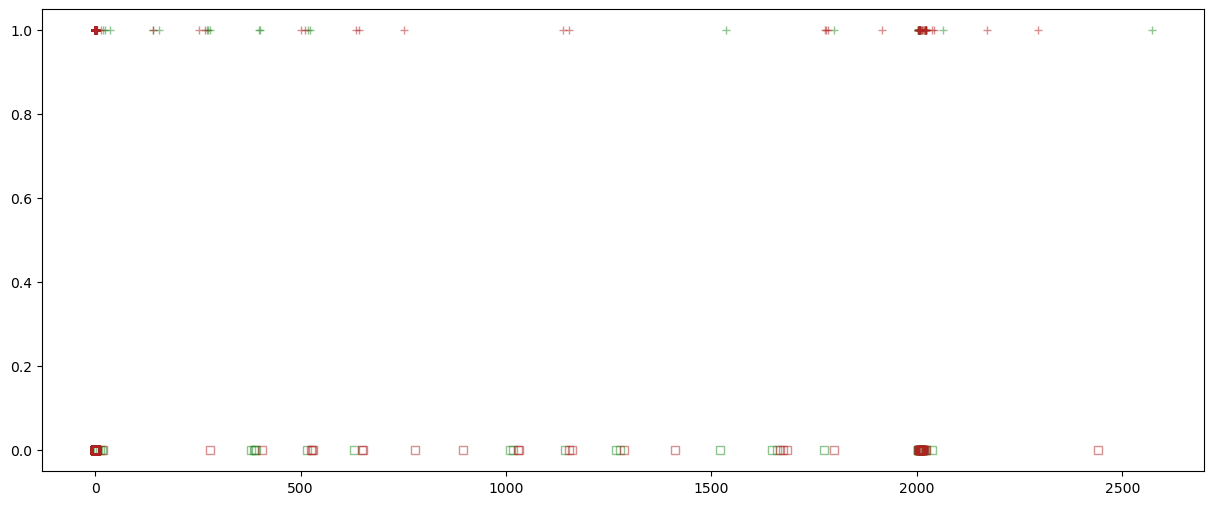

In [52]:
model_LogReg = LogisticRegression(penalty = None, max_iter = 10000)
model_LogReg.fit(X_train, y_train)
y_pred = model_LogReg.predict(X_test)
TP = (y_pred==1) & (y_test==1)
TN = (y_pred==0) & (y_test==0)
FP = (y_pred==1) & (y_test==0)
FN = (y_pred==0) & (y_test==1)

right = 'forestgreen'
wrong = 'firebrick'
positive = '+'
negative = 's'

fig, ax = plt.subplots(1,1, figsize = (15, 6))
ax.plot(X_test[TP], y_pred[TP], color = right, alpha = 0.5, marker = positive, linewidth = 0, label = 'True Positive')
ax.plot(X_test[TN], y_pred[TN], color = right, markerfacecolor='none',alpha = 0.5, marker = negative, linewidth = 0, label = 'True Negative')
ax.plot(X_test[FP], y_pred[FP], color = wrong, alpha = 0.5, marker = positive, linewidth = 0, label = 'False Positive')
ax.plot(X_test[FN], y_pred[FN], color = wrong, markerfacecolor='none', alpha = 0.5, marker = negative, linewidth = 0, label = 'False Negative')

plt.show()

In [53]:
y_pred_prob = model_LogReg.predict_proba(X_test)
y_pred_prob

array([[0.16925791, 0.11649232, 0.17361922, ..., 0.15822579, 0.12619517,
        0.12422257],
       [0.10983355, 0.14274967, 0.1689596 , ..., 0.19748448, 0.10545111,
        0.11004238],
       [0.08219461, 0.12146574, 0.1622029 , ..., 0.25499259, 0.12419746,
        0.08787709],
       ...,
       [0.11471122, 0.13396012, 0.1920611 , ..., 0.18835704, 0.10170524,
        0.12000393],
       [0.17821416, 0.13536108, 0.17496262, ..., 0.15289773, 0.1248328 ,
        0.10444459],
       [0.12131577, 0.13299445, 0.14338051, ..., 0.18988081, 0.14506135,
        0.09779023]])

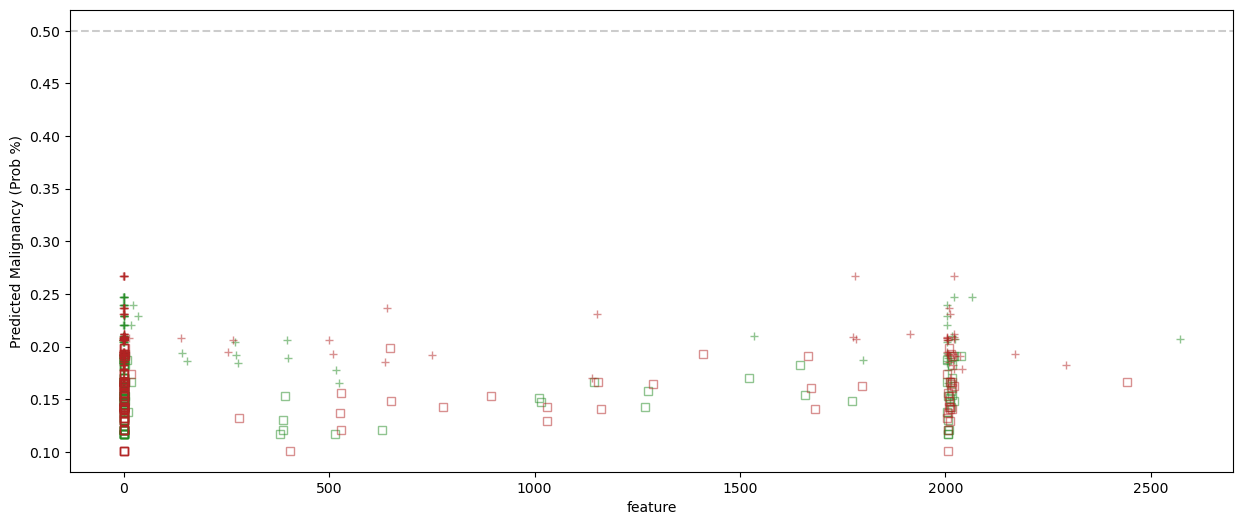

In [55]:
fig, ax = plt.subplots(1,1, figsize = (15, 6))
ax.plot(X_test[TP], y_pred_prob[TP,1], color = right, alpha = 0.5, marker = positive, linewidth = 0, label = 'True Positive')
ax.plot(X_test[TN], y_pred_prob[TN,1], color = right, markerfacecolor='none',alpha = 0.5, marker = negative, linewidth = 0, label = 'True Negative')
ax.plot(X_test[FP], y_pred_prob[FP,1], color = wrong, alpha = 0.5, marker = positive, linewidth = 0, label = 'False Positive')
ax.plot(X_test[FN], y_pred_prob[FN,1], color = wrong, markerfacecolor='none', alpha = 0.5, marker = negative, linewidth = 0, label = 'False Negative')

ax.set_xlabel('feature')
ax.set_ylabel('Predicted Malignancy (Prob %)')

plt.axhline(y = 0.5, color = 'k', linestyle = '--', alpha = 0.2)
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? I chose the decision tree because it handles nonlinear relatonships and mixed data types better than logistic regression.
 - What was your accuracy? 0.15